In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from regressors import stats

In [2]:
df = pd.read_excel("fragile_state_index.xlsx", header=[0])
#pd.read_excel("/tmp/sample.xlsx", usecols = "B:F", skiprows=[0])

In [3]:
    dictionary = {"key1": "value1"}
print(dictionary["key1"])

value1


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

Unnamed: 0                            int64
Country                              object
Year                                  int64
Rank                                 object
Total                               float64
C1: Security Apparatus              float64
C2: Factionalized Elites            float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object


In [5]:
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,Sudan,2006,1st,112.300000,9.8,9.1,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,1,Congo Democratic Republic,2006,2nd,110.100000,9.8,9.6,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,2,Cote d'Ivoire,2006,3rd,109.200000,9.8,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,3,Iraq,2006,4th,109.000000,9.8,9.7,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,4,Zimbabwe,2006,5th,108.900000,9.4,8.5,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2628,Iceland,2020,174th,17.800000,1.0,1.8,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
2629,2629,Denmark,2020,175th,17.213587,1.6,1.4,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
2630,2630,Switzerland,2020,176th,17.094086,1.4,1.0,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
2631,2631,Norway,2020,177th,16.191210,1.8,1.1,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [6]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
# Define target data
# Create category_columns and numeric_columns variables
X = df.drop(['Country', 'Rank','Year','Total', 'E2: Economic Inequality'], axis=1)
X 

,Unnamed: 0,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,9.8,9.1,9.7,7.50000,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,1,9.8,9.6,9.1,8.10000,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,2,9.8,9.8,9.8,9.00000,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,3,9.8,9.7,9.8,8.20000,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,4,9.4,8.5,8.5,9.80000,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2628,1.0,1.8,0.7,2.80000,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
2629,2629,1.6,1.4,4.0,1.30000,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
2630,2630,1.4,1.0,3.0,1.60000,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
2631,2631,1.8,1.1,3.6,1.69121,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [7]:
# Fill in missing values in X with zeroes
X = X.fillna(0)
y = df['E2: Economic Inequality']

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Unnamed: 0                          True
C1: Security Apparatus              True
C2: Factionalized Elites            True
C3: Group Grievance                 True
E1: Economy                         True
E3: Human Flight and Brain Drain    True
P1: State Legitimacy                True
P2: Public Services                 True
P3: Human Rights                    True
S1: Demographic Pressures           True
S2: Refugees and IDPs               True
X1: External Intervention           True
Change from Previous Year           True
dtype: bool

In [10]:
X.dtypes

Unnamed: 0                            int64
C1: Security Apparatus              float64
C2: Factionalized Elites            float64
C3: Group Grievance                 float64
E1: Economy                         float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train.head()

,Unnamed: 0,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
2217,2217,4.9,7.0,3.7,4.008167,4.900000,7.58215,4.400000,7.200000,5.600000,3.7,4.800000,0.0000
718,718,5.0,8.0,8.5,7.000000,7.000000,7.50000,7.400000,7.500000,9.100000,7.0,7.500000,0.0000
2143,2143,8.5,7.8,4.2,6.600000,7.475282,6.80000,8.400000,5.948356,8.800000,6.3,7.800000,0.0000
2271,2271,2.4,1.5,1.1,3.100000,2.565197,0.70000,1.441696,1.700000,1.532412,1.7,1.100000,0.0000
2537,2537,5.0,6.3,4.2,7.900000,8.200000,4.70000,5.600000,2.956628,6.393654,5.1,8.228119,-0.8181


In [14]:
nn_model = tf.keras.models.Sequential()

In [15]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [16]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [17]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 26)                364       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 27        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [19]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
62/62 [==============================] - 0s 869us/step - loss: 23.6732
Epoch 2/100
62/62 [==============================] - 0s 851us/step - loss: 5.1259
Epoch 3/100
62/62 [==============================] - 0s 853us/step - loss: 1.3733
Epoch 4/100
62/62 [==============================] - 0s 869us/step - loss: 1.3447
Epoch 5/100
62/62 [==============================] - 0s 816us/step - loss: 1.3107
Epoch 6/100
62/62 [==============================] - 0s 869us/step - loss: 1.2736
Epoch 7/100
62/62 [==============================] - 0s 820us/step - loss: 1.2356
Epoch 8/100
62/62 [==============================] - 0s 853us/step - loss: 1.1763
Epoch 9/100
62/62 [==============================] - 0s 885us/step - loss: 1.1274
Epoch 10/100
62/62 [==============================] - 0s 819us/step - loss: 1.0886
Epoch 11/100
62/62 [==============================] - 0s 788us/step - loss: 1.0520
Epoch 12/100
62/62 [==============================] - 0s 772us/step - loss: 1.0217
Epoch 13/100

In [20]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [21]:
r2_score(y_train, y_train_pred)

0.817287518455007

In [22]:
r2_score(y_test, y_test_pred)

0.8322403677983083

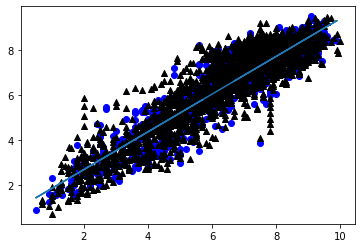

In [23]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [24]:
deep_model = tf.keras.models.Sequential()

In [25]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu', input_dim = len(X.columns)))

In [26]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu'))

In [27]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [28]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [29]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 1,095
Trainable params: 1,095
Non-trainable params: 0
_________________________________________________________________


In [30]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [31]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
62/62 [==============================] - 0s 788us/step - loss: 32.3669
Epoch 2/100
62/62 [==============================] - 0s 788us/step - loss: 5.1468
Epoch 3/100
62/62 [==============================] - 0s 970us/step - loss: 1.3859
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 1.3055
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 1.2375
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 1.1709
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 1.0986
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 1.0375
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 0.9876
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 0.9471
Epoch 11/100
62/62 [==============================] - 0s 924us/step - loss: 0.9140
Epoch 12/100
62/62 [==============================] - 0s 901us/step - loss: 0.8991
Epoch 13/100
62/62 [======

In [32]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [33]:
r2_score(y_train, y_train_pred)

0.856604974708522

In [34]:
r2_score(y_test, y_test_pred)

0.8593385793267324

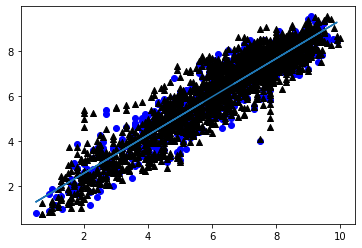

In [35]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
model.score(X_train_scaled, y_train)

0.8056239918730009

In [39]:
model.score(X_test_scaled, y_test)

0.8204943352996286

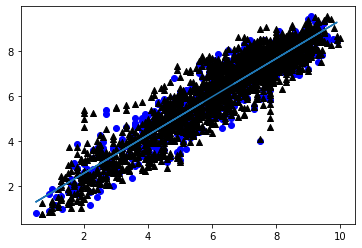

In [40]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [41]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [42]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_train, y_train, X.columns)

coef_pval:
 [0.00000000e+00 0.00000000e+00 2.18631456e-01 7.35693848e-01
 0.00000000e+00 2.31213049e-10 0.00000000e+00 3.28626015e-14
 0.00000000e+00 8.30523370e-05 0.00000000e+00 2.58535132e-05
 7.31199045e-05 4.46556785e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-3.2892 -0.5803 -0.0294  0.5555  3.8567


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        1.976903    0.093304  21.1878  0.000000
Unnamed: 0                       -0.000382    0.000013 -28.7194  0.000000
C1: Security Apparatus            0.025056    0.020361   1.2306  0.218631
C2: Factionalized Elites          0.007100    0.021030   0.3376  0.735694
C3: Group Grievance               0.145302    0.016214   8.9613  0.000000
E1: Economy                      -0.123248    0.019341  -6.3723  0.000000
E3: Human Flight and Brain Drain  0.164008    0.016086  10.1956  0.000000
P1: State Legitimacy              0.17587

In [43]:
ols = linear_model.LinearRegression()
ols.fit(X_test, y_test)

LinearRegression()

In [44]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_test, y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_test, y_test, X.columns)

coef_pval:
 [0.00000000e+00 0.00000000e+00 6.16841319e-01 3.72265543e-01
 1.92956762e-13 3.85670293e-03 8.65130190e-12 8.45231457e-02
 6.54528755e-07 3.29802293e-01 0.00000000e+00 8.80487205e-05
 3.65147334e-02 2.27704485e-04]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-3.4717 -0.5667 -0.0411  0.5695  2.8182


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        1.792011    0.154995  11.5617  0.000000
Unnamed: 0                       -0.000408    0.000022 -18.2836  0.000000
C1: Security Apparatus            0.017278    0.034516   0.5006  0.616841
C2: Factionalized Elites          0.031510    0.035292   0.8928  0.372266
C3: Group Grievance               0.202704    0.026991   7.5101  0.000000
E1: Economy                      -0.093671    0.032301  -2.8999  0.003857
E3: Human Flight and Brain Drain  0.196431    0.028252   6.9528  0.000000
P1: State Legitimacy              0.07058